In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt


In [2]:
Asthma_df = pd.read_csv('Asthma.csv')

In [3]:
Asthma_df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'Topic', 'Question',
       'DataValue', 'DataValueUnit', 'DataValueType', 'DatavalueFootnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1',
       'Stratification1'],
      dtype='object')

In [4]:
Asthma_df['DataValueUnit'].value_counts()

DataValueUnit
%                      29016
cases per 10,000        3784
cases per 1,000,000     3436
Number                   474
Name: count, dtype: int64

In [5]:
Asthma_df['Question'].value_counts()


Question
Current asthma prevalence among adults aged >= 18 years                                    7662
Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma       5560
Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma    5402
Asthma mortality rate                                                                      5154
Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma       4339
Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma    4314
Hospitalizations for asthma                                                                3507
Emergency department visit rate for asthma                                                 2169
Asthma prevalence among women aged 18-44 years                                             1739
Name: count, dtype: int64

In [6]:
Asthma_df['LocationAbbr'].value_counts()

LocationAbbr
FL    1088
MD    1057
AZ    1054
NJ    1049
NC    1042
NY    1022
SC     946
MI     942
WI     934
WA     920
CA     904
CO     895
KY     895
IA     893
MN     883
HI     880
GA     853
MA     845
OR     834
TX     829
NV     786
NM     776
NE     763
RI     760
AR     759
OH     758
VA     748
IN     740
PA     737
MS     737
CT     727
UT     713
MO     703
AL     691
OK     684
KS     681
IL     658
VT     644
SD     640
LA     625
TN     624
WV     617
DC     567
ME     529
DE     529
MT     525
ID     520
WY     476
AK     462
ND     462
NH     457
PR     409
US     374
GU     185
VI      15
Name: count, dtype: int64

In [7]:
#This code will show me if the YearStart column and the YearEnd column are all the same or not
same_years = (Asthma_df['YearStart'] == Asthma_df['YearEnd']).all()

if same_years:
    print("The 'YearStart' and 'YearEnd' columns have the same values in all rows.")
else:
    print("The 'YearStart' and 'YearEnd' columns do not have the same values in all rows.")

The 'YearStart' and 'YearEnd' columns have the same values in all rows.


In [8]:
#need to put the YearStart in order
Asthma_df=Asthma_df.sort_values(by='YearEnd')
Asthma_df

,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValue,DataValueUnit,DataValueType,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1
1888,2010,2010,IA,Asthma,Emergency department visit rate for asthma,14135.00,NaN,Number,NaN,NaN,NaN,Overall,Overall
8271,2010,2010,NV,Asthma,Asthma mortality rate,9.70,"cases per 1,000,000",Age-adjusted Rate,NaN,6.30,14.20,Overall,Overall
8274,2010,2010,SD,Asthma,Hospitalizations for asthma,8.51,"cases per 10,000",Crude Rate,NaN,7.61,9.40,Gender,Female
8280,2010,2010,HI,Asthma,Hospitalizations for asthma,5.10,"cases per 10,000",Age-adjusted Rate,NaN,4.39,5.82,Race/Ethnicity,"White, non-Hispanic"
8282,2010,2010,RI,Asthma,Hospitalizations for asthma,12.25,"cases per 10,000",Crude Rate,NaN,11.29,13.21,Gender,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30732,2021,2021,OH,Asthma,Influenza vaccination among noninstitutionaliz...,39.70,%,Crude Prevalence,NaN,32.10,47.90,Gender,Male
30739,2021,2021,OH,Asthma,Influenza vaccination among noninstitutionaliz...,42.00,%,Age-adjusted Prevalence,NaN,37.00,47.10,Race/Ethnicity,"White, non-Hispanic"
12500,2021,2021,AZ,Asthma,Current asthma prevalence among adults aged >=...,6.60,%,Age-adjusted Prevalence,NaN,5.70,7.60,Gender,Male
24128,2021,2021,MN,Asthma,Pneumococcal vaccination among noninstitutiona...,35.90,%,Crude Prevalence,NaN,29.40,42.90,Gender,Male


In [9]:
#This would turn 'YearEnd' into a date time by year but im sure why would need to do this will investigate more
#Asthma_df['YearEnd'] = pd.to_datetime(Asthma_df['YearEnd'], format='%Y')

#This code allows us to display value counts in order by year so we can see the order of years and how many rows of data each year contains
# use this code if you convert to datetime (year_end_counts = Asthma_df['YearEnd'].dt.year.value_counts().sort_index())
year_end_counts = Asthma_df['YearEnd'].value_counts().sort_index()
year_end_counts
#data summary for years: it looks like 2007 could be considered an outlier and possibly unusable for our analysis

YearEnd
2010    1167
2011    3103
2012    3097
2013    3816
2014    4017
2015    3903
2016    3916
2017    3946
2018    4038
2019    3036
2020    3128
2021    2679
Name: count, dtype: int64

In [11]:
# chekcing the dtype of the column 'YearEnd', thus far int64 is our goal, but might check again if datetime becomes our targeted dtype
Asthma_df['YearEnd'].dtype


dtype('int64')

In [12]:
#need to explore what kind of data we have in the DataValue comlumn to see what we can compare and use for a graph
#footnotes should give me an idea of what the numbers mean, check against documentation for further understanding
#need to understand if the questions datavalue is infering more or lesslikley hood of chronic desease
#Questions could be something that we could compare, need to check if the datavalues are comparable for all the same Questions
#what will groupby do if i groupby question: desired result it will group all same questions together to have comparable data amongst the same questions
#I might also need to groupby year: desired result all the same question whithin a particular year grouped together so I can show yearly changes with comparable data
#The LocationAbbr includes US, which has to be addressed
#we need to seperate or group by year,question, stratificationCategory1 and then stratification1 if not Overall


Asthma_df


,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValue,DataValueUnit,DataValueType,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1
1888,2010,2010,IA,Asthma,Emergency department visit rate for asthma,14135.00,NaN,Number,NaN,NaN,NaN,Overall,Overall
8271,2010,2010,NV,Asthma,Asthma mortality rate,9.70,"cases per 1,000,000",Age-adjusted Rate,NaN,6.30,14.20,Overall,Overall
8274,2010,2010,SD,Asthma,Hospitalizations for asthma,8.51,"cases per 10,000",Crude Rate,NaN,7.61,9.40,Gender,Female
8280,2010,2010,HI,Asthma,Hospitalizations for asthma,5.10,"cases per 10,000",Age-adjusted Rate,NaN,4.39,5.82,Race/Ethnicity,"White, non-Hispanic"
8282,2010,2010,RI,Asthma,Hospitalizations for asthma,12.25,"cases per 10,000",Crude Rate,NaN,11.29,13.21,Gender,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30732,2021,2021,OH,Asthma,Influenza vaccination among noninstitutionaliz...,39.70,%,Crude Prevalence,NaN,32.10,47.90,Gender,Male
30739,2021,2021,OH,Asthma,Influenza vaccination among noninstitutionaliz...,42.00,%,Age-adjusted Prevalence,NaN,37.00,47.10,Race/Ethnicity,"White, non-Hispanic"
12500,2021,2021,AZ,Asthma,Current asthma prevalence among adults aged >=...,6.60,%,Age-adjusted Prevalence,NaN,5.70,7.60,Gender,Male
24128,2021,2021,MN,Asthma,Pneumococcal vaccination among noninstitutiona...,35.90,%,Crude Prevalence,NaN,29.40,42.90,Gender,Male


In [14]:
#This groups the dataframe first by Year and then question, StratificationCat1, stratification, and finally groups by location
#It then applys a lambda function to make sure the years are in order.
#This currently does not address US in the locations with individual states
grouped_Asthma_df = Asthma_df.groupby(['YearEnd','Question','StratificationCategory1','Stratification1','LocationAbbr']).apply(
    lambda x: x.sort_values(by = 'YearEnd')).reset_index(drop = True)

grouped_Asthma_df.head()

/var/folders/v3/vqm7wj0557b3qz_jytk9mscc0000gn/T/ipykernel_4867/3096757273.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_Asthma_df = Asthma_df.groupby(['YearEnd','Question','StratificationCategory1','Stratification1','LocationAbbr']).apply(


,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValue,DataValueUnit,DataValueType,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1
0,2010,2010,AL,Asthma,Asthma mortality rate,44.0,NaN,Number,NaN,NaN,NaN,Gender,Female
1,2010,2010,AL,Asthma,Asthma mortality rate,15.4,"cases per 1,000,000",Age-adjusted Rate,NaN,11.1,20.7,Gender,Female
2,2010,2010,AL,Asthma,Asthma mortality rate,17.9,"cases per 1,000,000",Crude Rate,NaN,13.0,24.0,Gender,Female
3,2010,2010,AR,Asthma,Asthma mortality rate,15.9,"cases per 1,000,000",Age-adjusted Rate,NaN,10.6,23.1,Gender,Female
4,2010,2010,AR,Asthma,Asthma mortality rate,19.5,"cases per 1,000,000",Crude Rate,NaN,13.1,28.1,Gender,Female


In [18]:
#use this to look at a list of possible questions to choose from
grouped_Asthma_df['Question'].value_counts()

Question
Current asthma prevalence among adults aged >= 18 years                                    7662
Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma       5560
Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma    5402
Asthma mortality rate                                                                      5154
Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma       4339
Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma    4314
Hospitalizations for asthma                                                                3507
Emergency department visit rate for asthma                                                 2169
Asthma prevalence among women aged 18-44 years                                             1739
Name: count, dtype: int64

In [20]:
#The question is can we turn this into a function to apply to other csvs???

#creates a list with all the target valus in the Questions column
questions = grouped_Asthma_df['Question'].unique().tolist()
#creating an empty dictionary to store dataframes with their own unique questions
dfs = {}
#looping through our grouped dataframe to create multiple dataframes containing only one question along with its values and then storing them in a dictionary
# also sets their key values to the target question in their respective dataframes
for question in questions:
    df_name = question
    dfs[df_name] = grouped_Asthma_df.loc[grouped_Asthma_df['Question'] == question]\
        .loc[grouped_Asthma_df['LocationAbbr'] == 'US']\
        .loc[grouped_Asthma_df['StratificationCategory1'] == 'Overall']





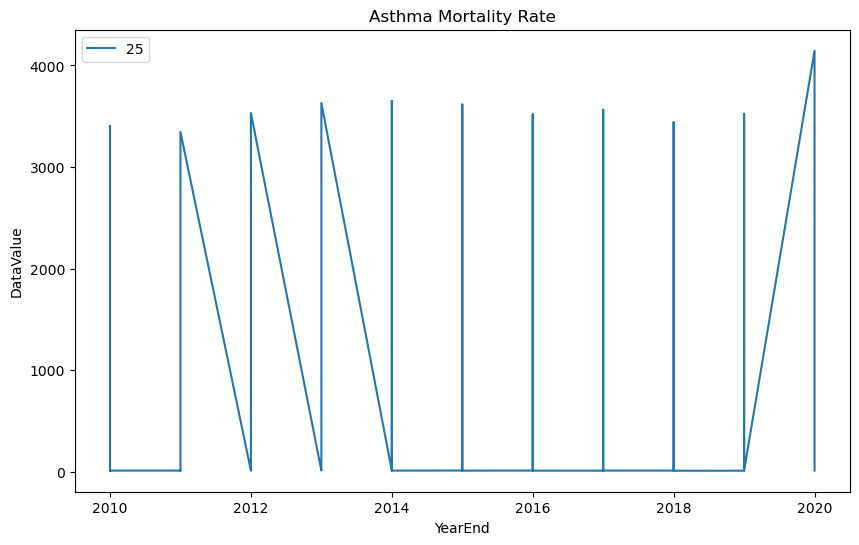

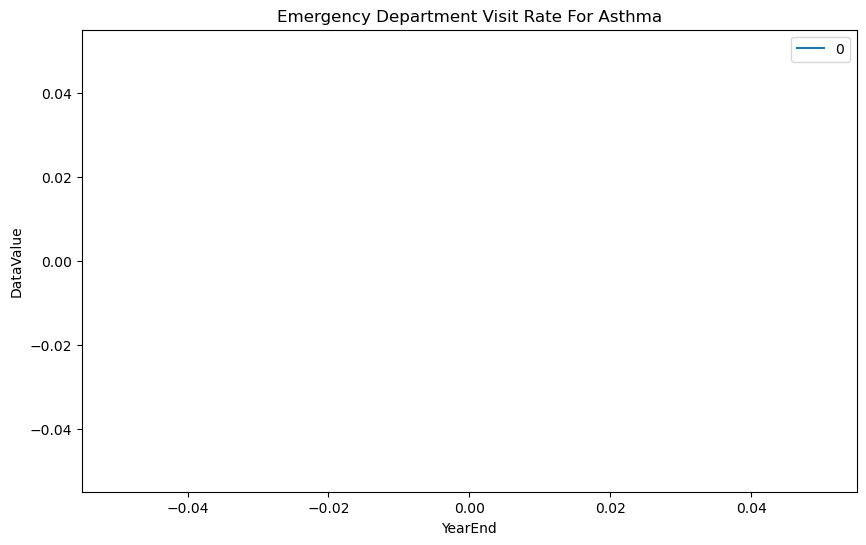

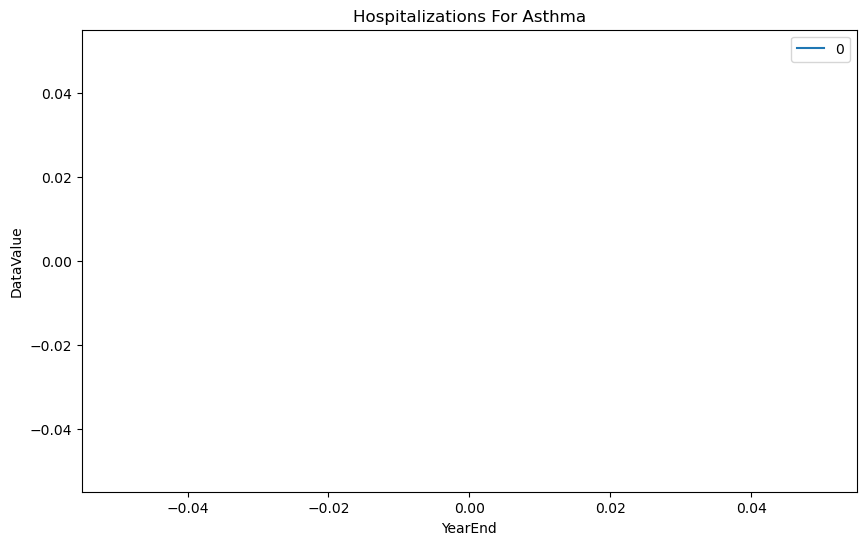

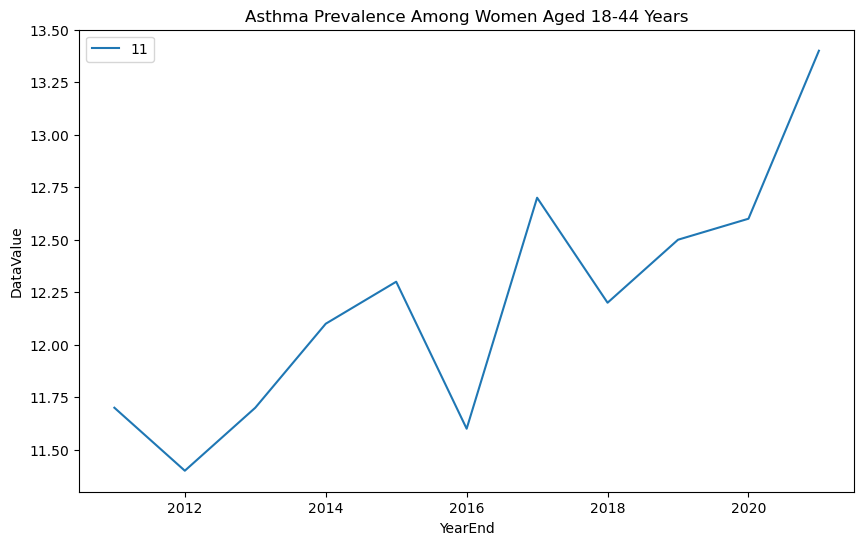

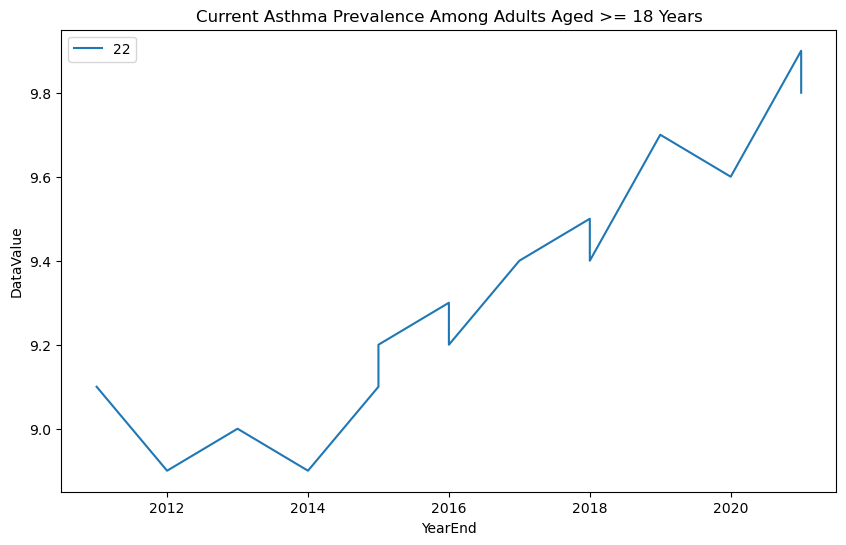

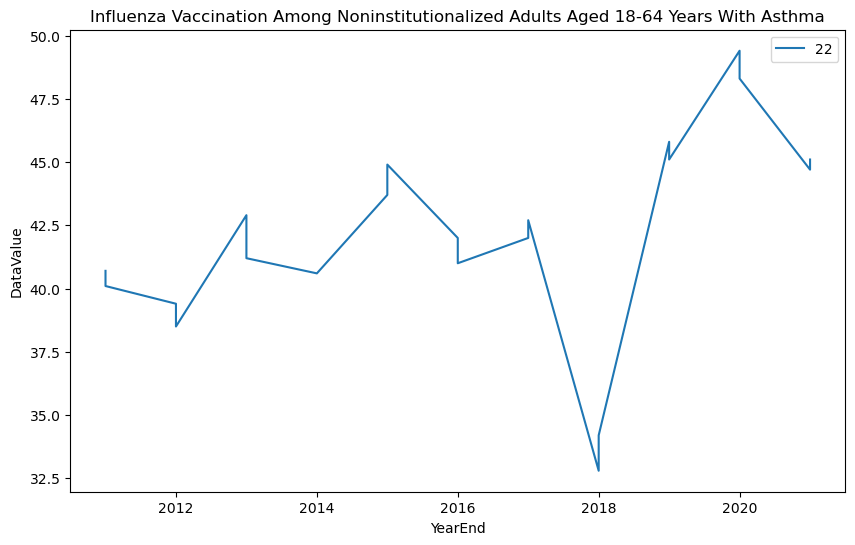

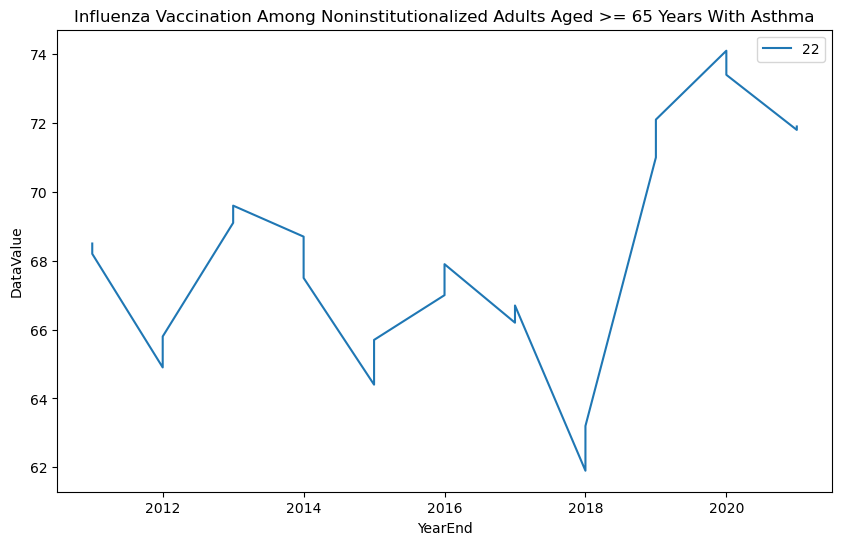

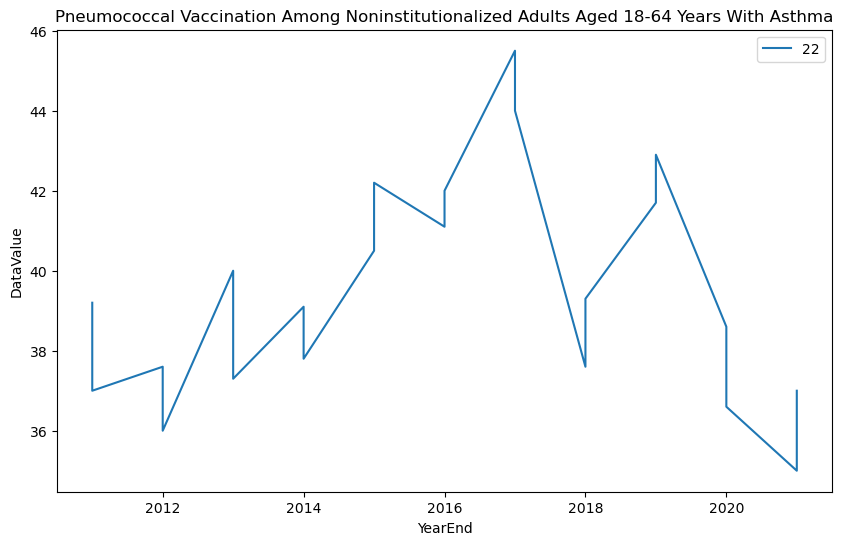

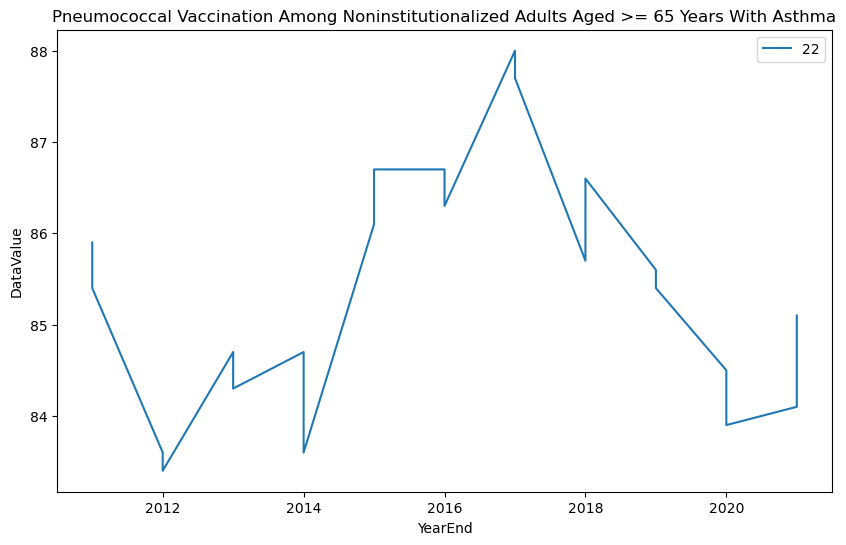

In [21]:
#loops through the dfs dictionary to extract the individual dfs by their 'Question' name and then plot them by yearend and datavalue
for df_name, df in dfs.items():
    plt.figure(figsize=(10, 6))
    plt.plot(df['YearEnd'], df['DataValue'], label=df['DataValueUnit'].count())
    plt.xlabel('YearEnd')
    plt.ylabel('DataValue')
    plt.title(df_name.replace('_', ' ').title())
    plt.legend()
    plt.show()